In [2]:

#### - Unsupervised Machine Learning and it's various algorithms

In [3]:
# K-Means Clustering

In [4]:
#Importing packages
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [5]:
#Generate two dimensional dataset
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 500, centers = 4,
                       cluster_std = 0.40, random_state = 0)

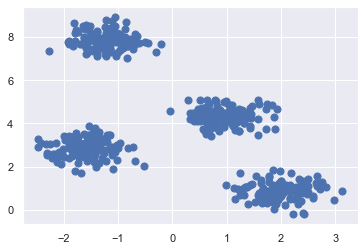

In [6]:
plt.scatter(X[:, 0], X[:, 1], s = 50);
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 4)

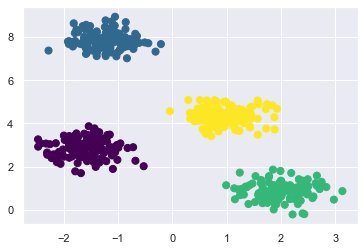

In [8]:
#Now to train the K-means model with input data
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_

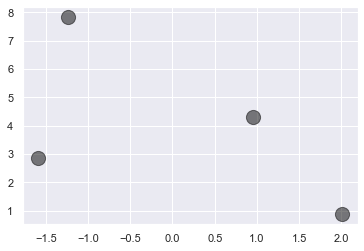

In [9]:
#Now I will plot and visualise the machine's findings based on the data given
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

In [10]:
#Mean Shift Algorithm

In [11]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [12]:
#The following code will help in generating the two-dimensional dataset, 
#containing four blobs, by using make_blob from the sklearn.dataset package

from sklearn.datasets import make_blobs

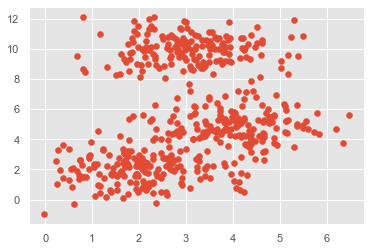

In [13]:
#Visualising the dataset:

centers = [[2,2],[4,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [14]:
#Now, we need to train the Mean Shift cluster model with the input data

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [15]:
#The following code will print the cluster centers and the expected number of cluster as per the input data

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
#[[ 3.23005036 3.84771893]
#[ 3.02057451 9.88928991]]
#Estimated clusters: 2

[[2.81166883 3.11417029]
 [3.06145043 9.97346572]]
Estimated clusters: 2


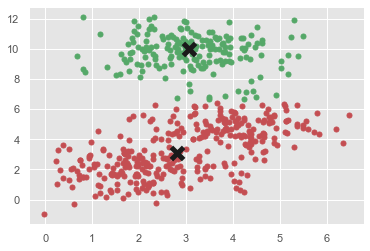

In [16]:
#Visualise machine's findings

colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
   marker = "x",color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()

In [17]:
#### -- Measuring the Clustering Performance


In [18]:
#### --- Silhouette Analysis
#### --- This method can be used to check the quality of clustering by measuring the distance between the clusters

In [19]:
"""
Analysis of silhouette score
The score has a range of [-1, 1]. Following is the analysis of this score −

Score of +1 − Score near +1 indicates that the sample is far away from the neighboring cluster.

Score of 0 − Score 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

Score of -1 − Negative score indicates that the samples have been assigned to the wrong clusters.
"""

'\nAnalysis of silhouette score\nThe score has a range of [-1, 1]. Following is the analysis of this score −\n\nScore of +1 − Score near +1 indicates that the sample is far away from the neighboring cluster.\n\nScore of 0 − Score 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.\n\nScore of -1 − Negative score indicates that the samples have been assigned to the wrong clusters.\n'

In [20]:
#Calculating Silhouette Score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [21]:
#With the help of the following code, we will generate the two-dimensional dataset, 
#containing four blobs, by using make_blob from the sklearn.dataset package
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples = 500, centers = 4, cluster_std = 0.40, random_state = 0)

In [22]:
#Initialize the variables
scores = []
values = np.arange(2, 10)

In [23]:
#iterate the K-means model through all the values and also need to train it with the input data
for num_clusters in values:
    kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
    kmeans.fit(X)


In [24]:
#estimate the silhouette score for the current clustering model using the Euclidean distance metric
from sklearn import metrics
score = metrics.silhouette_score(X, kmeans.labels_,
metric = 'euclidean', sample_size = len(X))

In [25]:
print("\nNumber of clusters =", num_clusters)
print("Silhouette score =", score)
scores.append(score)


Number of clusters = 9
Silhouette score = 0.32518739956654835


In [26]:
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)


Optimal number of clusters = 2


In [27]:
#Finding Nearest Neighbors
"""
The concept of finding nearest neighbors may be defined as the process of finding the closest point to the input point from the given dataset. The main use of this KNN)K-nearest neighbors) algorithm is to build classification systems that classify a data point on the proximity of the input data point to various classes
"""

'\nThe concept of finding nearest neighbors may be defined as the process of finding the closest point to the input point from the given dataset. The main use of this KNN)K-nearest neighbors) algorithm is to build classification systems that classify a data point on the proximity of the input data point to various classes\n'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [29]:
#define the input data
A = np.array([[3.1, 2.3], [2.3, 4.2], [3.9, 3.5], [3.7, 6.4], [4.8, 1.9], 
             [8.3, 3.1], [5.2, 7.5], [4.8, 4.7], [3.5, 5.1], [4.4, 2.9]])

In [30]:
#define the nearest neighbors
k = 3

In [31]:
#test data from which the nearest neighbors is to be found 
test_data = [3.3, 2.9]

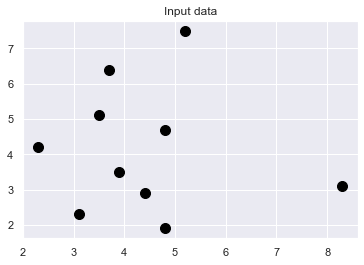

In [32]:
#visualize and plot the input data
plt.figure()
plt.title('Input data')
plt.scatter(A[:,0], A[:,1], marker = 'o', s = 100, color = 'black')

In [33]:
#we need to build the K Nearest Neighbor. The object also needs to be trained
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'auto').fit(X)
distances, indices = knn_model.kneighbors([test_data])

In [34]:
#print the K nearest neighbors as follows
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start = 1):
    print(str(rank) + " is", A)


K Nearest Neighbors:
1 is [[3.1 2.3]
 [2.3 4.2]
 [3.9 3.5]
 [3.7 6.4]
 [4.8 1.9]
 [8.3 3.1]
 [5.2 7.5]
 [4.8 4.7]
 [3.5 5.1]
 [4.4 2.9]]
2 is [[3.1 2.3]
 [2.3 4.2]
 [3.9 3.5]
 [3.7 6.4]
 [4.8 1.9]
 [8.3 3.1]
 [5.2 7.5]
 [4.8 4.7]
 [3.5 5.1]
 [4.4 2.9]]
3 is [[3.1 2.3]
 [2.3 4.2]
 [3.9 3.5]
 [3.7 6.4]
 [4.8 1.9]
 [8.3 3.1]
 [5.2 7.5]
 [4.8 4.7]
 [3.5 5.1]
 [4.4 2.9]]


ValueError: x and y must be the same size

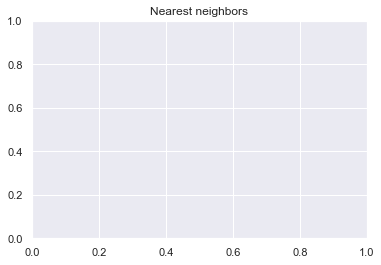

In [54]:
#visualize the nearest neighbors along with the test data point
# ????? X and Y Not Same Size???? 
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(A[:, 0], X[:, 1], marker = 'o', s = 100, color = 'k')
plt.scatter(A[indices][0][:][:, 0], A[indices][0][:][:, 1],
   marker = 'o', s = 250, color = 'k', facecolors = 'none')
plt.scatter(test_data[0], test_data[1],
   marker = 'x', s = 100, color = 'k')
plt.show()

In [36]:
#K-Nearest Neighbors Classifier#build a KNN classifier using that algorithm

In [37]:
from sklearn.datasets import *
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [47]:
#display the image of digit to verify what image we have to test
def Image_display(i):
   plt.imshow(digit['images'][i],cmap = 'Greys_r')
   plt.show()

In [48]:
# load the MNIST dataset
digit = load_digits()
digit_d = pd.DataFrame(digit['data'][0:1600])

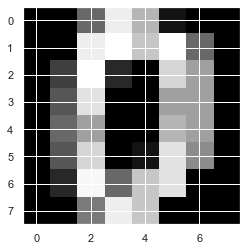

In [49]:
#on displaying the images we can see the output as follows
Image_display(0)

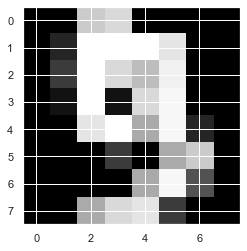

In [41]:
Image_display(9)

In [50]:
#create the training and testing data set and supply testing data set to the KNN classifiers
train_x = digit['data'][:1600]
train_y = digit['target'][:1600]
KNN = KNeighborsClassifier(20)
KNN.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=20)

In [51]:
#The following output will create the K nearest neighbor classifier constructor 
KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
   metric_params = None, n_jobs = 1, n_neighbors = 20, p = 2,
   weights = 'uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=20)

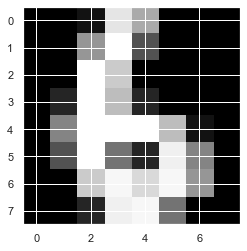

In [52]:
#We need to create the testing sample by providing any arbitrary number greater than 1600, which were the training samples
test = np.array(digit['data'][1725])
test1 = test.reshape(1,-1)
Image_display(1725)

In [53]:
#Now we will predict the test data as follows
KNN.predict(test1)

array([6])

In [46]:
digit['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])